In [1]:
import sys
import logging
import gym
from gym import spaces
import numpy as np
import networkx as nx
import cyberbattle.simulation.actions as actions
import cyberbattle._env.cyberbattle_env as cyberbattle_env
import cyberbattle.agents.random_agent as random_agent
import cyberbattle.samples.chainpattern.chainpattern as chainpattern
import importlib
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity


In [2]:
gym_env = gym.make('CyberBattleCBSHH-v0')

iteration_count = 500
training_episode_count = 50
eval_episode_count = 10

In [3]:
ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=12,
    maximum_total_credentials=5,
    identifiers=gym_env.identifiers
)

In [4]:
dql_no_ep = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=4,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0,
    epsilon_exponential_decay=10,
    epsilon_minimum=0,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="static epsilon"
)

###### static epsilon
Learning with: episode_count=50,iteration_count=500,ϵ=0,ϵ_min=0, ϵ_expdecay=10,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4
  ## Episode: 1/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||/home/jupyter-hoodit/cyberbattle/CBSHH/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 500|reward:  477.0|last_reward_at:  465|Elapsed Time: 0:00:01||


  Episode 1 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 2/18 (0.10)
    explore-connect: 1/14 (0.07)
    exploit-local: 2/53 (0.04)
    exploit-remote: 0/49 (0.00)
    exploit-connect: 1/353 (0.00)
  exploit deflected to exploration: 42
  ## Episode: 2/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 2|Iteration 500|reward:  174.0|last_reward_at:  252|Elapsed Time: 0:00:03||


  Episode 2 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 2/8 (0.20)
    explore-connect: 0/4 (0.00)
    exploit-local: 3/221 (0.01)
    exploit-remote: 0/109 (0.00)
    exploit-connect: 1/148 (0.01)
  exploit deflected to exploration: 18
  ## Episode: 3/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 3|Iteration 500|reward:  483.0|last_reward_at:  365|Elapsed Time: 0:00:03||


  Episode 3 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/264 (0.02)
    exploit-remote: 2/93 (0.02)
    exploit-connect: 2/127 (0.02)
  exploit deflected to exploration: 7
  ## Episode: 4/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 4|Iteration 500|reward:  483.0|last_reward_at:  204|Elapsed Time: 0:00:03||


  Episode 4 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 2/11 (0.15)
    explore-connect: 0/8 (0.00)
    exploit-local: 3/179 (0.02)
    exploit-remote: 0/223 (0.00)
    exploit-connect: 2/66 (0.03)
  exploit deflected to exploration: 27
  ## Episode: 5/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 5|Iteration 453|reward: 4483.0|last_reward_at:  453|Elapsed Time: 0:00:03||


  Episode 5 ended at t=453 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/212 (0.03)
    exploit-remote: 2/134 (0.01)
    exploit-connect: 3/88 (0.03)
  exploit deflected to exploration: 8
  ## Episode: 6/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 6|Iteration 299|reward: 4483.0|last_reward_at:  299|Elapsed Time: 0:00:02||


  Episode 6 ended at t=299 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/21 (0.09)
    explore-connect: 0/27 (0.00)
    exploit-local: 5/81 (0.06)
    exploit-remote: 1/62 (0.02)
    exploit-connect: 3/85 (0.03)
  exploit deflected to exploration: 62
  ## Episode: 7/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 7|Iteration 138|reward: 4483.0|last_reward_at:  138|Elapsed Time: 0:00:01||


  Episode 7 ended at t=138 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/39 (0.13)
    exploit-remote: 2/41 (0.05)
    exploit-connect: 3/41 (0.07)
  exploit deflected to exploration: 6
  ## Episode: 8/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 8|Iteration 127|reward: 4477.0|last_reward_at:  127|Elapsed Time: 0:00:01||


  Episode 8 ended at t=127 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/5 (0.00)
    explore-connect: 1/6 (0.14)
    exploit-local: 4/47 (0.08)
    exploit-remote: 2/18 (0.10)
    exploit-connect: 3/38 (0.07)
  exploit deflected to exploration: 15
  ## Episode: 9/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 9|Iteration 315|reward: 4483.0|last_reward_at:  315|Elapsed Time: 0:00:02||


  Episode 9 ended at t=315 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/17 (0.00)
    exploit-local: 6/99 (0.06)
    exploit-remote: 2/101 (0.02)
    exploit-connect: 3/67 (0.04)
  exploit deflected to exploration: 37
  ## Episode: 10/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 10|Iteration 74|reward: 4483.0|last_reward_at:   74|Elapsed Time: 0:00:00||


  Episode 10 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 7/18 (0.28)
    exploit-remote: 2/15 (0.12)
    exploit-connect: 3/21 (0.12)
  exploit deflected to exploration: 8
  ## Episode: 11/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 11|Iteration 27|reward: 4474.0|last_reward_at:   27|Elapsed Time: 0:00:00||


  Episode 11 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/5 (0.55)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 1
  ## Episode: 12/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 12|Iteration 65|reward: 4483.0|last_reward_at:   65|Elapsed Time: 0:00:00||


  Episode 12 ended at t=65 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 5/14 (0.26)
    exploit-remote: 3/21 (0.12)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 9
  ## Episode: 13/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 13|Iteration 54|reward: 4474.0|last_reward_at:   54|Elapsed Time: 0:00:00||


  Episode 13 ended at t=54 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/10 (0.38)
    exploit-remote: 0/16 (0.00)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 6
  ## Episode: 14/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 14|Iteration 42|reward: 4474.0|last_reward_at:   42|Elapsed Time: 0:00:00||


  Episode 14 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/8 (0.11)
    explore-connect: 1/7 (0.12)
    exploit-local: 5/6 (0.45)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 3/1 (0.75)
  exploit deflected to exploration: 19
  ## Episode: 15/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 15|Iteration 157|reward: 4483.0|last_reward_at:  157|Elapsed Time: 0:00:01||


  Episode 15 ended at t=157 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 1/9 (0.10)
    exploit-local: 6/37 (0.14)
    exploit-remote: 1/26 (0.04)
    exploit-connect: 3/58 (0.05)
  exploit deflected to exploration: 26
  ## Episode: 16/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 16|Iteration 21|reward: 4474.0|last_reward_at:   21|Elapsed Time: 0:00:00||


  Episode 16 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/0 (1.00)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 3/4 (0.43)
  exploit deflected to exploration: 3
  ## Episode: 17/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 17|Iteration 71|reward: 4483.0|last_reward_at:   71|Elapsed Time: 0:00:00||


  Episode 17 ended at t=71 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/15 (0.29)
    exploit-remote: 1/20 (0.05)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 5
  ## Episode: 18/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 18|Iteration 205|reward: 4483.0|last_reward_at:  205|Elapsed Time: 0:00:02||


  Episode 18 ended at t=205 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/12 (0.14)
    explore-connect: 0/11 (0.00)
    exploit-local: 6/67 (0.08)
    exploit-remote: 0/32 (0.00)
    exploit-connect: 3/68 (0.04)
  exploit deflected to exploration: 29
  ## Episode: 19/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 19|Iteration 37|reward: 4483.0|last_reward_at:   37|Elapsed Time: 0:00:00||


  Episode 19 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/7 (0.22)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/7 (0.00)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 15
  ## Episode: 20/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 20|Iteration 68|reward: 4483.0|last_reward_at:   68|Elapsed Time: 0:00:00||


  Episode 20 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 5/17 (0.23)
    exploit-remote: 2/15 (0.12)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 11
  ## Episode: 21/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 21|Iteration 76|reward: 4483.0|last_reward_at:   76|Elapsed Time: 0:00:00||


  Episode 21 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/16 (0.27)
    exploit-remote: 2/21 (0.09)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 11
  ## Episode: 22/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 22|Iteration 80|reward: 4474.0|last_reward_at:   80|Elapsed Time: 0:00:01||


  Episode 22 ended at t=80 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/10 (0.09)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/27 (0.18)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 19
  ## Episode: 23/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 23|Iteration 102|reward: 4483.0|last_reward_at:  102|Elapsed Time: 0:00:00||


  Episode 23 ended at t=102 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/36 (0.14)
    exploit-remote: 2/18 (0.10)
    exploit-connect: 3/30 (0.09)
  exploit deflected to exploration: 7
  ## Episode: 24/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 24|Iteration 40|reward: 4477.0|last_reward_at:   40|Elapsed Time: 0:00:00||


  Episode 24 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/4 (0.00)
    exploit-local: 4/9 (0.31)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 10
  ## Episode: 25/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 25|Iteration 107|reward: 4483.0|last_reward_at:  107|Elapsed Time: 0:00:00||


  Episode 25 ended at t=107 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/2 (0.00)
    explore-connect: 1/3 (0.25)
    exploit-local: 6/35 (0.15)
    exploit-remote: 2/34 (0.06)
    exploit-connect: 3/18 (0.14)
  exploit deflected to exploration: 9
  ## Episode: 26/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 26|Iteration 75|reward: 4483.0|last_reward_at:   75|Elapsed Time: 0:00:00||


  Episode 26 ended at t=75 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 6/24 (0.20)
    exploit-remote: 2/17 (0.11)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 3
  ## Episode: 27/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 27|Iteration 83|reward: 4483.0|last_reward_at:   83|Elapsed Time: 0:00:00||


  Episode 27 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 7/18 (0.28)
    exploit-remote: 2/18 (0.10)
    exploit-connect: 3/24 (0.11)
  exploit deflected to exploration: 11
  ## Episode: 28/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 28|Iteration 74|reward: 4483.0|last_reward_at:   74|Elapsed Time: 0:00:00||


  Episode 28 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 1/1 (0.50)
    exploit-local: 6/10 (0.38)
    exploit-remote: 2/23 (0.08)
    exploit-connect: 3/26 (0.10)
  exploit deflected to exploration: 4
  ## Episode: 29/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 29|Iteration 100|reward: 4483.0|last_reward_at:  100|Elapsed Time: 0:00:00||


  Episode 29 ended at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/4 (0.00)
    explore-connect: 1/3 (0.25)
    exploit-local: 6/25 (0.19)
    exploit-remote: 2/32 (0.06)
    exploit-connect: 3/24 (0.11)
  exploit deflected to exploration: 8
  ## Episode: 30/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 30|Iteration 41|reward: 4477.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 30 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 5/3 (0.62)
    exploit-remote: 2/14 (0.12)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 8
  ## Episode: 31/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 31|Iteration 56|reward: 4483.0|last_reward_at:   56|Elapsed Time: 0:00:00||


  Episode 31 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/11 (0.00)
    exploit-local: 4/11 (0.27)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 21
  ## Episode: 32/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 32|Iteration 52|reward: 4483.0|last_reward_at:   52|Elapsed Time: 0:00:00||


  Episode 32 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/14 (0.30)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 3/11 (0.21)
  exploit deflected to exploration: 6
  ## Episode: 33/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 33|Iteration 69|reward: 4483.0|last_reward_at:   69|Elapsed Time: 0:00:00||


  Episode 33 ended at t=69 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/2 (0.00)
    explore-connect: 1/3 (0.25)
    exploit-local: 5/19 (0.21)
    exploit-remote: 2/28 (0.07)
    exploit-connect: 3/5 (0.38)
  exploit deflected to exploration: 7
  ## Episode: 34/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 34|Iteration 94|reward: 4483.0|last_reward_at:   94|Elapsed Time: 0:00:00||


  Episode 34 ended at t=94 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/37 (0.14)
    exploit-remote: 2/30 (0.06)
    exploit-connect: 3/12 (0.20)
  exploit deflected to exploration: 4
  ## Episode: 35/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 35|Iteration 34|reward: 4483.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 35 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/5 (0.55)
    exploit-remote: 2/15 (0.12)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 36|Iteration 104|reward: 4483.0|last_reward_at:  104|Elapsed Time: 0:00:00||


  Episode 36 ended at t=104 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/26 (0.19)
    exploit-remote: 2/41 (0.05)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 4
  ## Episode: 37/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 37|Iteration 500|reward:   59.0|last_reward_at:   45|Elapsed Time: 0:00:03||


  Episode 37 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/6 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 2/139 (0.01)
    exploit-remote: 2/127 (0.02)
    exploit-connect: 0/212 (0.00)
  exploit deflected to exploration: 18
  ## Episode: 38/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 38|Iteration 42|reward: 4483.0|last_reward_at:   42|Elapsed Time: 0:00:00||


  Episode 38 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/10 (0.38)
    exploit-remote: 2/14 (0.12)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 1
  ## Episode: 39/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 39|Iteration 139|reward: 4483.0|last_reward_at:  139|Elapsed Time: 0:00:01||


  Episode 39 ended at t=139 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 6/29 (0.17)
    exploit-remote: 3/52 (0.05)
    exploit-connect: 3/45 (0.06)
  exploit deflected to exploration: 1
  ## Episode: 40/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 40|Iteration 46|reward: 4483.0|last_reward_at:   46|Elapsed Time: 0:00:00||


  Episode 40 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 6/7 (0.46)
    exploit-remote: 2/18 (0.10)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 2
  ## Episode: 41/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 41|Iteration 68|reward: 4483.0|last_reward_at:   68|Elapsed Time: 0:00:00||


  Episode 41 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 6/15 (0.29)
    exploit-remote: 3/22 (0.12)
    exploit-connect: 3/18 (0.14)
  exploit deflected to exploration: 1
  ## Episode: 42/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 42|Iteration 108|reward: 4483.0|last_reward_at:  108|Elapsed Time: 0:00:00||


  Episode 42 ended at t=108 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 1/1 (0.50)
    exploit-local: 6/29 (0.17)
    exploit-remote: 2/39 (0.05)
    exploit-connect: 3/27 (0.10)
  exploit deflected to exploration: 2
  ## Episode: 43/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 43|Iteration 43|reward: 4483.0|last_reward_at:   43|Elapsed Time: 0:00:00||


  Episode 43 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 5/5 (0.50)
    exploit-remote: 3/13 (0.19)
    exploit-connect: 3/7 (0.30)
  exploit deflected to exploration: 7
  ## Episode: 44/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 44|Iteration 173|reward: 4483.0|last_reward_at:  173|Elapsed Time: 0:00:01||


  Episode 44 ended at t=173 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 0/16 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 5/29 (0.15)
    exploit-remote: 2/89 (0.02)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 23
  ## Episode: 45/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 45|Iteration 79|reward: 4483.0|last_reward_at:   79|Elapsed Time: 0:00:00||


  Episode 45 ended at t=79 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/14 (0.30)
    exploit-remote: 3/32 (0.09)
    exploit-connect: 3/18 (0.14)
  exploit deflected to exploration: 3
  ## Episode: 46/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 46|Iteration 57|reward: 4477.0|last_reward_at:   57|Elapsed Time: 0:00:00||


  Episode 46 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/4 (0.56)
    exploit-remote: 2/25 (0.07)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 10
  ## Episode: 47/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 47|Iteration 74|reward: 4483.0|last_reward_at:   74|Elapsed Time: 0:00:00||


  Episode 47 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/13 (0.32)
    exploit-remote: 2/30 (0.06)
    exploit-connect: 3/18 (0.14)
  exploit deflected to exploration: 2
  ## Episode: 48/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 48|Iteration 33|reward: 4477.0|last_reward_at:   33|Elapsed Time: 0:00:00||


  Episode 48 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 1/0 (1.00)
    exploit-local: 5/4 (0.56)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 1
  ## Episode: 49/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 49|Iteration 52|reward: 4483.0|last_reward_at:   52|Elapsed Time: 0:00:00||


  Episode 49 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/8 (0.43)
    exploit-remote: 2/21 (0.09)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'static epsilon' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 50|Iteration 31|reward: 4477.0|last_reward_at:   31|Elapsed Time: 0:00:00||


  Episode 50 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 5/2 (0.71)
    exploit-remote: 2/16 (0.11)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 2
simulation ended


In [5]:
dql_ep = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=4,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.9,
    epsilon_exponential_decay=2000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="exponential epsilon"
)

###### exponential epsilon
Learning with: episode_count=50,iteration_count=500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=2000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4
  ## Episode: 1/50 'exponential epsilon' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 1|Iteration 500|reward:  174.0|last_reward_at:   87|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/55 (0.07)
    explore-remote: 2/160 (0.01)
    explore-connect: 1/179 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/98 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 2/50 'exponential epsilon' ϵ=0.7035, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 2|Iteration 454|reward: 4483.0|last_reward_at:  454|Elapsed Time: 0:00:03||


  Episode 2 ended at t=454 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/45 (0.12)
    explore-remote: 2/133 (0.01)
    explore-connect: 2/130 (0.02)
    exploit-local: 1/96 (0.01)
    exploit-remote: 0/27 (0.00)
    exploit-connect: 1/11 (0.08)
  exploit deflected to exploration: 21
  ## Episode: 3/50 'exponential epsilon' ϵ=0.5626, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 3|Iteration 500|reward:  174.0|last_reward_at:   58|Elapsed Time: 0:00:03||


  Episode 3 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/48 (0.02)
    explore-remote: 2/117 (0.02)
    explore-connect: 0/108 (0.00)
    exploit-local: 4/179 (0.02)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 1/27 (0.04)
  exploit deflected to exploration: 24
  ## Episode: 4/50 'exponential epsilon' ϵ=0.4404, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 4|Iteration 456|reward: 4483.0|last_reward_at:  456|Elapsed Time: 0:00:03||


  Episode 4 ended at t=456 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/82 (0.01)
    exploit-local: 4/201 (0.02)
    exploit-remote: 0/35 (0.00)
    exploit-connect: 3/26 (0.10)
  exploit deflected to exploration: 20
  ## Episode: 5/50 'exponential epsilon' ϵ=0.3527, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 5|Iteration 166|reward: 4483.0|last_reward_at:  166|Elapsed Time: 0:00:01||


  Episode 5 ended at t=166 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 3/25 (0.11)
    explore-connect: 0/35 (0.00)
    exploit-local: 3/70 (0.04)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 3/14 (0.18)
  exploit deflected to exploration: 19
  ## Episode: 6/50 'exponential epsilon' ϵ=0.3254, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 6|Iteration 156|reward: 4483.0|last_reward_at:  156|Elapsed Time: 0:00:01||


  Episode 6 ended at t=156 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 2/18 (0.10)
    explore-connect: 1/24 (0.04)
    exploit-local: 4/60 (0.06)
    exploit-remote: 0/17 (0.00)
    exploit-connect: 3/15 (0.17)
  exploit deflected to exploration: 11
  ## Episode: 7/50 'exponential epsilon' ϵ=0.3017, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 7|Iteration 245|reward: 4483.0|last_reward_at:  245|Elapsed Time: 0:00:02||


  Episode 7 ended at t=245 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/12 (0.25)
    explore-remote: 0/34 (0.00)
    explore-connect: 0/36 (0.00)
    exploit-local: 2/98 (0.02)
    exploit-remote: 2/37 (0.05)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 26
  ## Episode: 8/50 'exponential epsilon' ϵ=0.2681, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 8|Iteration 61|reward: 4474.0|last_reward_at:   61|Elapsed Time: 0:00:00||


  Episode 8 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/6 (0.00)
    exploit-local: 5/21 (0.19)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 8
  ## Episode: 9/50 'exponential epsilon' ϵ=0.2603, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 9|Iteration 71|reward: 4474.0|last_reward_at:   71|Elapsed Time: 0:00:00||


  Episode 9 ended at t=71 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/10 (0.00)
    exploit-local: 4/15 (0.21)
    exploit-remote: 0/19 (0.00)
    exploit-connect: 4/1 (0.80)
  exploit deflected to exploration: 13
  ## Episode: 10/50 'exponential epsilon' ϵ=0.2516, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 10|Iteration 61|reward: 4474.0|last_reward_at:   61|Elapsed Time: 0:00:00||


  Episode 10 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/9 (0.10)
    explore-connect: 1/10 (0.09)
    exploit-local: 5/15 (0.25)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 3/12 (0.20)
  exploit deflected to exploration: 7
  ## Episode: 11/50 'exponential epsilon' ϵ=0.2443, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 11|Iteration 97|reward: 4483.0|last_reward_at:   97|Elapsed Time: 0:00:01||


  Episode 11 ended at t=97 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 1/15 (0.06)
    explore-connect: 1/18 (0.05)
    exploit-local: 5/16 (0.24)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 3/12 (0.20)
  exploit deflected to exploration: 21
  ## Episode: 12/50 'exponential epsilon' ϵ=0.2332, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 12|Iteration 219|reward: 4483.0|last_reward_at:  219|Elapsed Time: 0:00:01||


  Episode 12 ended at t=219 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 2/34 (0.06)
    explore-connect: 0/27 (0.00)
    exploit-local: 4/30 (0.12)
    exploit-remote: 1/37 (0.03)
    exploit-connect: 3/69 (0.04)
  exploit deflected to exploration: 29
  ## Episode: 13/50 'exponential epsilon' ϵ=0.2101, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 13|Iteration 71|reward: 4483.0|last_reward_at:   71|Elapsed Time: 0:00:00||


  Episode 13 ended at t=71 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/7 (0.00)
    exploit-local: 6/12 (0.33)
    exploit-remote: 2/16 (0.11)
    exploit-connect: 3/17 (0.15)
  exploit deflected to exploration: 9
  ## Episode: 14/50 'exponential epsilon' ϵ=0.2031, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 14|Iteration 56|reward: 4483.0|last_reward_at:   56|Elapsed Time: 0:00:00||


  Episode 14 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/10 (0.00)
    exploit-local: 4/7 (0.36)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 17
  ## Episode: 15/50 'exponential epsilon' ϵ=0.1978, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 15|Iteration 53|reward: 4474.0|last_reward_at:   53|Elapsed Time: 0:00:00||


  Episode 15 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/11 (0.00)
    exploit-local: 6/13 (0.32)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 7
  ## Episode: 16/50 'exponential epsilon' ϵ=0.1929, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 16|Iteration 49|reward: 4483.0|last_reward_at:   49|Elapsed Time: 0:00:00||


  Episode 16 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/8 (0.11)
    explore-connect: 0/5 (0.00)
    exploit-local: 6/12 (0.33)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 3/3 (0.50)
  exploit deflected to exploration: 7
  ## Episode: 17/50 'exponential epsilon' ϵ=0.1884, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 17|Iteration 68|reward: 4483.0|last_reward_at:   68|Elapsed Time: 0:00:00||


  Episode 17 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/8 (0.11)
    explore-connect: 0/9 (0.00)
    exploit-local: 4/9 (0.31)
    exploit-remote: 1/27 (0.04)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 11
  ## Episode: 18/50 'exponential epsilon' ϵ=0.1825, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 18|Iteration 34|reward: 4474.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 18 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 1/5 (0.17)
    exploit-local: 6/7 (0.46)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 3/4 (0.43)
  exploit deflected to exploration: 6
  ## Episode: 19/50 'exponential epsilon' ϵ=0.1796, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 19|Iteration 22|reward: 4477.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 19 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/2 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 3/3 (0.50)
  exploit deflected to exploration: 4
  ## Episode: 20/50 'exponential epsilon' ϵ=0.1777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 20|Iteration 16|reward: 4468.0|last_reward_at:   16|Elapsed Time: 0:00:00||


  Episode 20 ended at t=16 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/1 (0.50)
    explore-connect: 1/2 (0.33)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/3 (0.50)
  exploit deflected to exploration: 2
  ## Episode: 21/50 'exponential epsilon' ϵ=0.1764, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 21|Iteration 37|reward: 4474.0|last_reward_at:   37|Elapsed Time: 0:00:00||


  Episode 21 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 1/1 (0.50)
    exploit-local: 4/3 (0.57)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 3/9 (0.25)
  exploit deflected to exploration: 2
  ## Episode: 22/50 'exponential epsilon' ϵ=0.1733, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 22|Iteration 49|reward: 4474.0|last_reward_at:   49|Elapsed Time: 0:00:00||


  Episode 22 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/12 (0.29)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 5
  ## Episode: 23/50 'exponential epsilon' ϵ=0.1694, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 23|Iteration 79|reward: 4483.0|last_reward_at:   79|Elapsed Time: 0:00:00||


  Episode 23 ended at t=79 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/9 (0.10)
    explore-connect: 0/11 (0.00)
    exploit-local: 5/6 (0.45)
    exploit-remote: 1/6 (0.14)
    exploit-connect: 3/32 (0.09)
  exploit deflected to exploration: 11
  ## Episode: 24/50 'exponential epsilon' ϵ=0.1632, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 24|Iteration 65|reward: 4483.0|last_reward_at:   65|Elapsed Time: 0:00:00||


  Episode 24 ended at t=65 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/8 (0.00)
    exploit-local: 7/6 (0.54)
    exploit-remote: 1/19 (0.05)
    exploit-connect: 3/3 (0.50)
  exploit deflected to exploration: 16
  ## Episode: 25/50 'exponential epsilon' ϵ=0.1583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 25|Iteration 38|reward: 4477.0|last_reward_at:   38|Elapsed Time: 0:00:00||


  Episode 25 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 1/6 (0.14)
    explore-connect: 1/5 (0.17)
    exploit-local: 3/5 (0.38)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 7
  ## Episode: 26/50 'exponential epsilon' ϵ=0.1555, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 26|Iteration 110|reward: 4483.0|last_reward_at:  110|Elapsed Time: 0:00:01||


  Episode 26 ended at t=110 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/22 (0.00)
    exploit-local: 6/15 (0.29)
    exploit-remote: 2/22 (0.08)
    exploit-connect: 3/8 (0.27)
  exploit deflected to exploration: 35
  ## Episode: 27/50 'exponential epsilon' ϵ=0.1477, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 27|Iteration 130|reward: 4483.0|last_reward_at:  130|Elapsed Time: 0:00:01||


  Episode 27 ended at t=130 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/21 (0.00)
    exploit-local: 5/29 (0.15)
    exploit-remote: 1/30 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 29
  ## Episode: 28/50 'exponential epsilon' ϵ=0.1391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 28|Iteration 32|reward: 4468.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 28 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/5 (0.00)
    exploit-local: 6/5 (0.55)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 5
  ## Episode: 29/50 'exponential epsilon' ϵ=0.1370, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 29|Iteration 78|reward: 4483.0|last_reward_at:   78|Elapsed Time: 0:00:00||


  Episode 29 ended at t=78 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/10 (0.17)
    explore-connect: 1/11 (0.08)
    exploit-local: 6/14 (0.30)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 3/18 (0.14)
  exploit deflected to exploration: 13
  ## Episode: 30/50 'exponential epsilon' ϵ=0.1321, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 30|Iteration 157|reward: 4474.0|last_reward_at:  157|Elapsed Time: 0:00:01||


  Episode 30 ended at t=157 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 0/23 (0.00)
    explore-connect: 0/13 (0.00)
    exploit-local: 5/41 (0.11)
    exploit-remote: 1/28 (0.03)
    exploit-connect: 3/36 (0.08)
  exploit deflected to exploration: 20
  ## Episode: 31/50 'exponential epsilon' ϵ=0.1229, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 31|Iteration 99|reward: 4483.0|last_reward_at:   99|Elapsed Time: 0:00:01||


  Episode 31 ended at t=99 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/12 (0.00)
    exploit-local: 6/10 (0.38)
    exploit-remote: 2/27 (0.07)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 26
  ## Episode: 32/50 'exponential epsilon' ϵ=0.1175, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 32|Iteration 78|reward: 4483.0|last_reward_at:   78|Elapsed Time: 0:00:00||


  Episode 32 ended at t=78 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 0/10 (0.00)
    explore-connect: 1/11 (0.08)
    exploit-local: 6/18 (0.25)
    exploit-remote: 2/16 (0.11)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 16
  ## Episode: 33/50 'exponential epsilon' ϵ=0.1134, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 33|Iteration 34|reward: 4483.0|last_reward_at:   34|Elapsed Time: 0:00:00||


  Episode 33 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/8 (0.43)
    exploit-remote: 1/12 (0.08)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 1
  ## Episode: 34/50 'exponential epsilon' ϵ=0.1116, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 34|Iteration 94|reward: 4483.0|last_reward_at:   94|Elapsed Time: 0:00:01||


  Episode 34 ended at t=94 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/11 (0.08)
    explore-connect: 0/4 (0.00)
    exploit-local: 7/42 (0.14)
    exploit-remote: 1/17 (0.06)
    exploit-connect: 3/7 (0.30)
  exploit deflected to exploration: 7
  ## Episode: 35/50 'exponential epsilon' ϵ=0.1070, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 35|Iteration 128|reward: 4483.0|last_reward_at:  128|Elapsed Time: 0:00:01||


  Episode 35 ended at t=128 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/17 (0.00)
    explore-connect: 1/10 (0.09)
    exploit-local: 7/27 (0.21)
    exploit-remote: 2/35 (0.05)
    exploit-connect: 2/20 (0.09)
  exploit deflected to exploration: 23
  ## Episode: 36/50 'exponential epsilon' ϵ=0.1009, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 36|Iteration 74|reward: 4474.0|last_reward_at:   74|Elapsed Time: 0:00:00||


  Episode 36 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/9 (0.00)
    explore-connect: 1/6 (0.14)
    exploit-local: 6/19 (0.24)
    exploit-remote: 1/18 (0.05)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 10
  ## Episode: 37/50 'exponential epsilon' ϵ=0.0976, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 37|Iteration 80|reward: 4483.0|last_reward_at:   80|Elapsed Time: 0:00:00||


  Episode 37 ended at t=80 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 7/21 (0.25)
    exploit-remote: 2/20 (0.09)
    exploit-connect: 3/15 (0.17)
  exploit deflected to exploration: 8
  ## Episode: 38/50 'exponential epsilon' ϵ=0.0942, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 38|Iteration 55|reward: 4483.0|last_reward_at:   55|Elapsed Time: 0:00:00||


  Episode 38 ended at t=55 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 6/8 (0.43)
    exploit-remote: 2/15 (0.12)
    exploit-connect: 3/11 (0.21)
  exploit deflected to exploration: 6
  ## Episode: 39/50 'exponential epsilon' ϵ=0.0919, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 39|Iteration 35|reward: 4483.0|last_reward_at:   35|Elapsed Time: 0:00:00||


  Episode 39 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/1 (0.00)
    exploit-local: 7/3 (0.70)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 2
  ## Episode: 40/50 'exponential epsilon' ϵ=0.0905, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 40|Iteration 72|reward: 4483.0|last_reward_at:   72|Elapsed Time: 0:00:00||


  Episode 40 ended at t=72 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/18 (0.25)
    exploit-remote: 3/18 (0.14)
    exploit-connect: 3/12 (0.20)
  exploit deflected to exploration: 5
  ## Episode: 41/50 'exponential epsilon' ϵ=0.0877, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 41|Iteration 49|reward: 4474.0|last_reward_at:   49|Elapsed Time: 0:00:00||


  Episode 41 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/3 (0.00)
    exploit-local: 5/15 (0.25)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 3
  ## Episode: 42/50 'exponential epsilon' ϵ=0.0858, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 42|Iteration 56|reward: 4474.0|last_reward_at:   56|Elapsed Time: 0:00:00||


  Episode 42 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 6/19 (0.24)
    exploit-remote: 2/10 (0.17)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 11
  ## Episode: 43/50 'exponential epsilon' ϵ=0.0837, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 43|Iteration 39|reward: 4483.0|last_reward_at:   39|Elapsed Time: 0:00:00||


  Episode 43 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/7 (0.46)
    exploit-remote: 2/12 (0.14)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 5
  ## Episode: 44/50 'exponential epsilon' ϵ=0.0823, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 44|Iteration 98|reward: 4483.0|last_reward_at:   98|Elapsed Time: 0:00:01||


  Episode 44 ended at t=98 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 0/10 (0.00)
    explore-connect: 0/10 (0.00)
    exploit-local: 5/18 (0.22)
    exploit-remote: 2/33 (0.06)
    exploit-connect: 3/12 (0.20)
  exploit deflected to exploration: 14
  ## Episode: 45/50 'exponential epsilon' ϵ=0.0788, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 45|Iteration 32|reward: 4483.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 45 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 6/5 (0.55)
    exploit-remote: 2/11 (0.15)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'exponential epsilon' ϵ=0.0777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 46|Iteration 128|reward: 4483.0|last_reward_at:  128|Elapsed Time: 0:00:01||


  Episode 46 ended at t=128 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/9 (0.00)
    exploit-local: 6/37 (0.14)
    exploit-remote: 2/33 (0.06)
    exploit-connect: 3/20 (0.13)
  exploit deflected to exploration: 13
  ## Episode: 47/50 'exponential epsilon' ϵ=0.0735, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 47|Iteration 67|reward: 4483.0|last_reward_at:   67|Elapsed Time: 0:00:00||


  Episode 47 ended at t=67 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/7 (0.12)
    explore-connect: 0/13 (0.00)
    exploit-local: 6/5 (0.55)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 13
  ## Episode: 48/50 'exponential epsilon' ϵ=0.0714, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 48|Iteration 129|reward: 4483.0|last_reward_at:  129|Elapsed Time: 0:00:01||


  Episode 48 ended at t=129 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/35 (0.15)
    exploit-remote: 2/49 (0.04)
    exploit-connect: 3/17 (0.15)
  exploit deflected to exploration: 10
  ## Episode: 49/50 'exponential epsilon' ϵ=0.0676, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 49|Iteration 66|reward: 4483.0|last_reward_at:   66|Elapsed Time: 0:00:00||


  Episode 49 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/9 (0.10)
    explore-connect: 0/7 (0.00)
    exploit-local: 7/12 (0.37)
    exploit-remote: 1/14 (0.07)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 13
  ## Episode: 50/50 'exponential epsilon' ϵ=0.0657, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=4


Episode 50|Iteration 57|reward: 4483.0|last_reward_at:   57|Elapsed Time: 0:00:00||


  Episode 50 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/11 (0.35)
    exploit-remote: 1/8 (0.11)
    exploit-connect: 3/20 (0.13)
  exploit deflected to exploration: 6
simulation ended


In [6]:
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=50,iteration_count=500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/50 'Random search' ϵ=1.0000, 


Episode 1|Iteration 500|reward:  174.0|last_reward_at:   68|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/78 (0.06)
    explore-remote: 2/212 (0.01)
    explore-connect: 1/202 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/50 'Random search' ϵ=1.0000, 


Episode 2|Iteration 500|reward:  174.0|last_reward_at:   68|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/76 (0.06)
    explore-remote: 2/205 (0.01)
    explore-connect: 1/211 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/50 'Random search' ϵ=1.0000, 


Episode 3|Iteration 354|reward: 4483.0|last_reward_at:  354|Elapsed Time: 0:00:00||


  Episode 3 ended at t=354 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/41 (0.13)
    explore-remote: 2/153 (0.01)
    explore-connect: 4/148 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/50 'Random search' ϵ=1.0000, 


Episode 4|Iteration 500|reward:  174.0|last_reward_at:  235|Elapsed Time: 0:00:00||


  Episode 4 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/85 (0.06)
    explore-remote: 2/203 (0.01)
    explore-connect: 1/204 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/50 'Random search' ϵ=1.0000, 


Episode 5|Iteration 500|reward:  174.0|last_reward_at:  198|Elapsed Time: 0:00:00||


  Episode 5 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/81 (0.06)
    explore-remote: 2/193 (0.01)
    explore-connect: 1/218 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/50 'Random search' ϵ=1.0000, 


Episode 6|Iteration 500|reward:  159.0|last_reward_at:  464|Elapsed Time: 0:00:00||


  Episode 6 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/98 (0.03)
    explore-remote: 2/206 (0.01)
    explore-connect: 1/190 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/50 'Random search' ϵ=1.0000, 


Episode 7|Iteration 500|reward: 1483.0|last_reward_at:  304|Elapsed Time: 0:00:00||


  Episode 7 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/79 (0.07)
    explore-remote: 2/186 (0.01)
    explore-connect: 3/224 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/50 'Random search' ϵ=1.0000, 


Episode 8|Iteration 500|reward:  474.0|last_reward_at:  466|Elapsed Time: 0:00:00||


  Episode 8 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/81 (0.06)
    explore-remote: 2/198 (0.01)
    explore-connect: 2/212 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'Random search' ϵ=1.0000, 


Episode 9|Iteration 500|reward:  483.0|last_reward_at:  129|Elapsed Time: 0:00:00||


  Episode 9 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/62 (0.09)
    explore-remote: 2/231 (0.01)
    explore-connect: 2/197 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'Random search' ϵ=1.0000, 


Episode 10|Iteration 500|reward: 1483.0|last_reward_at:  372|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/88 (0.06)
    explore-remote: 2/203 (0.01)
    explore-connect: 3/198 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'Random search' ϵ=1.0000, 


Episode 11|Iteration 500|reward:  174.0|last_reward_at:  492|Elapsed Time: 0:00:00||


  Episode 11 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/100 (0.05)
    explore-remote: 2/206 (0.01)
    explore-connect: 1/186 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'Random search' ϵ=1.0000, 


Episode 12|Iteration 500|reward:  174.0|last_reward_at:  354|Elapsed Time: 0:00:00||


  Episode 12 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/91 (0.05)
    explore-remote: 2/193 (0.01)
    explore-connect: 1/208 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'Random search' ϵ=1.0000, 


Episode 13|Iteration 500|reward:  483.0|last_reward_at:  273|Elapsed Time: 0:00:00||


  Episode 13 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/98 (0.06)
    explore-remote: 2/205 (0.01)
    explore-connect: 2/187 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'Random search' ϵ=1.0000, 


Episode 14|Iteration 500|reward:  483.0|last_reward_at:  319|Elapsed Time: 0:00:00||


  Episode 14 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/93 (0.06)
    explore-remote: 2/198 (0.01)
    explore-connect: 2/199 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'Random search' ϵ=1.0000, 


Episode 15|Iteration 500|reward:  174.0|last_reward_at:  270|Elapsed Time: 0:00:00||


  Episode 15 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/92 (0.05)
    explore-remote: 2/190 (0.01)
    explore-connect: 1/210 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'Random search' ϵ=1.0000, 


Episode 16|Iteration 203|reward: 4483.0|last_reward_at:  203|Elapsed Time: 0:00:00||


  Episode 16 ended at t=203 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/25 (0.19)
    explore-remote: 3/84 (0.03)
    explore-connect: 3/82 (0.04)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'Random search' ϵ=1.0000, 


Episode 17|Iteration 500|reward: 1483.0|last_reward_at:  294|Elapsed Time: 0:00:00||


  Episode 17 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/88 (0.06)
    explore-remote: 2/191 (0.01)
    explore-connect: 3/210 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 18/50 'Random search' ϵ=1.0000, 


Episode 18|Iteration 500|reward:  174.0|last_reward_at:   69|Elapsed Time: 0:00:00||


  Episode 18 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/78 (0.06)
    explore-remote: 2/223 (0.01)
    explore-connect: 1/191 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'Random search' ϵ=1.0000, 


Episode 19|Iteration 500|reward:  174.0|last_reward_at:  318|Elapsed Time: 0:00:00||


  Episode 19 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/100 (0.05)
    explore-remote: 2/190 (0.01)
    explore-connect: 1/202 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'Random search' ϵ=1.0000, 


Episode 20|Iteration 500|reward:  483.0|last_reward_at:  340|Elapsed Time: 0:00:00||


  Episode 20 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/84 (0.07)
    explore-remote: 2/187 (0.01)
    explore-connect: 2/219 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 21/50 'Random search' ϵ=1.0000, 


Episode 21|Iteration 431|reward: 4483.0|last_reward_at:  431|Elapsed Time: 0:00:00||


  Episode 21 ended at t=431 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/64 (0.09)
    explore-remote: 2/167 (0.01)
    explore-connect: 4/188 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 22/50 'Random search' ϵ=1.0000, 


Episode 22|Iteration 500|reward:  174.0|last_reward_at:  185|Elapsed Time: 0:00:00||


  Episode 22 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/86 (0.05)
    explore-remote: 2/196 (0.01)
    explore-connect: 1/210 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'Random search' ϵ=1.0000, 


Episode 23|Iteration 500|reward:  174.0|last_reward_at:   63|Elapsed Time: 0:00:00||


  Episode 23 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/85 (0.06)
    explore-remote: 2/228 (0.01)
    explore-connect: 1/179 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 24/50 'Random search' ϵ=1.0000, 


Episode 24|Iteration 500|reward:  483.0|last_reward_at:  143|Elapsed Time: 0:00:00||


  Episode 24 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/76 (0.07)
    explore-remote: 2/226 (0.01)
    explore-connect: 2/188 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'Random search' ϵ=1.0000, 


Episode 25|Iteration 500|reward:  483.0|last_reward_at:  333|Elapsed Time: 0:00:00||


  Episode 25 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/93 (0.06)
    explore-remote: 2/201 (0.01)
    explore-connect: 2/196 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'Random search' ϵ=1.0000, 


Episode 26|Iteration 500|reward:  174.0|last_reward_at:  470|Elapsed Time: 0:00:00||


  Episode 26 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/111 (0.04)
    explore-remote: 2/197 (0.01)
    explore-connect: 1/184 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'Random search' ϵ=1.0000, 


Episode 27|Iteration 500|reward:  174.0|last_reward_at:   56|Elapsed Time: 0:00:00||


  Episode 27 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/65 (0.07)
    explore-remote: 2/216 (0.01)
    explore-connect: 1/211 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'Random search' ϵ=1.0000, 


Episode 28|Iteration 500|reward:  159.0|last_reward_at:  500|Elapsed Time: 0:00:00||


  Episode 28 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/113 (0.03)
    explore-remote: 2/190 (0.01)
    explore-connect: 1/191 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'Random search' ϵ=1.0000, 


Episode 29|Iteration 500|reward: 1483.0|last_reward_at:  454|Elapsed Time: 0:00:00||


  Episode 29 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/90 (0.06)
    explore-remote: 2/220 (0.01)
    explore-connect: 3/179 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'Random search' ϵ=1.0000, 


Episode 30|Iteration 500|reward:  483.0|last_reward_at:  314|Elapsed Time: 0:00:00||


  Episode 30 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/71 (0.08)
    explore-remote: 2/226 (0.01)
    explore-connect: 2/193 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'Random search' ϵ=1.0000, 


Episode 31|Iteration 500|reward:  174.0|last_reward_at:   86|Elapsed Time: 0:00:00||


  Episode 31 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/80 (0.06)
    explore-remote: 2/203 (0.01)
    explore-connect: 1/209 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'Random search' ϵ=1.0000, 


Episode 32|Iteration 500|reward:  483.0|last_reward_at:  232|Elapsed Time: 0:00:00||


  Episode 32 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/90 (0.06)
    explore-remote: 2/185 (0.01)
    explore-connect: 2/215 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'Random search' ϵ=1.0000, 


Episode 33|Iteration 382|reward: 4483.0|last_reward_at:  382|Elapsed Time: 0:00:00||


  Episode 33 ended at t=382 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/63 (0.09)
    explore-remote: 3/140 (0.02)
    explore-connect: 3/167 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'Random search' ϵ=1.0000, 


Episode 34|Iteration 500|reward:  174.0|last_reward_at:  355|Elapsed Time: 0:00:00||


  Episode 34 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/107 (0.04)
    explore-remote: 2/191 (0.01)
    explore-connect: 1/194 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'Random search' ϵ=1.0000, 


Episode 35|Iteration 268|reward: 4483.0|last_reward_at:  268|Elapsed Time: 0:00:00||


  Episode 35 ended at t=268 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/35 (0.15)
    explore-remote: 2/107 (0.02)
    explore-connect: 4/114 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'Random search' ϵ=1.0000, 


Episode 36|Iteration 462|reward: 4483.0|last_reward_at:  462|Elapsed Time: 0:00:00||


  Episode 36 ended at t=462 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/85 (0.07)
    explore-remote: 2/193 (0.01)
    explore-connect: 4/172 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'Random search' ϵ=1.0000, 


Episode 37|Iteration 241|reward: 4483.0|last_reward_at:  241|Elapsed Time: 0:00:00||


  Episode 37 ended at t=241 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/42 (0.12)
    explore-remote: 2/92 (0.02)
    explore-connect: 4/95 (0.04)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'Random search' ϵ=1.0000, 


Episode 38|Iteration 500|reward:  474.0|last_reward_at:  361|Elapsed Time: 0:00:00||


  Episode 38 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/74 (0.06)
    explore-remote: 2/194 (0.01)
    explore-connect: 2/223 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'Random search' ϵ=1.0000, 


Episode 39|Iteration 500|reward:  174.0|last_reward_at:  400|Elapsed Time: 0:00:00||


  Episode 39 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/110 (0.04)
    explore-remote: 2/191 (0.01)
    explore-connect: 1/191 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'Random search' ϵ=1.0000, 


Episode 40|Iteration 500|reward:  174.0|last_reward_at:   69|Elapsed Time: 0:00:00||


  Episode 40 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/73 (0.06)
    explore-remote: 2/202 (0.01)
    explore-connect: 1/217 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'Random search' ϵ=1.0000, 


Episode 41|Iteration 500|reward:  483.0|last_reward_at:  498|Elapsed Time: 0:00:00||


  Episode 41 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/84 (0.07)
    explore-remote: 2/229 (0.01)
    explore-connect: 2/177 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'Random search' ϵ=1.0000, 


Episode 42|Iteration 500|reward:  174.0|last_reward_at:   65|Elapsed Time: 0:00:00||


  Episode 42 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/72 (0.06)
    explore-remote: 2/216 (0.01)
    explore-connect: 1/204 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'Random search' ϵ=1.0000, 


Episode 43|Iteration 483|reward: 4483.0|last_reward_at:  483|Elapsed Time: 0:00:00||


  Episode 43 ended at t=483 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/104 (0.05)
    explore-remote: 3/183 (0.02)
    explore-connect: 3/184 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'Random search' ϵ=1.0000, 


Episode 44|Iteration 500|reward:  174.0|last_reward_at:  116|Elapsed Time: 0:00:00||


  Episode 44 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/98 (0.05)
    explore-remote: 2/201 (0.01)
    explore-connect: 1/193 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'Random search' ϵ=1.0000, 


Episode 45|Iteration 387|reward: 4483.0|last_reward_at:  387|Elapsed Time: 0:00:00||


  Episode 45 ended at t=387 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/74 (0.07)
    explore-remote: 2/149 (0.01)
    explore-connect: 4/152 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'Random search' ϵ=1.0000, 


Episode 46|Iteration 370|reward: 4483.0|last_reward_at:  370|Elapsed Time: 0:00:00||


  Episode 46 ended at t=370 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/59 (0.09)
    explore-remote: 2/149 (0.01)
    explore-connect: 4/150 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'Random search' ϵ=1.0000, 


Episode 47|Iteration 500|reward:  174.0|last_reward_at:  417|Elapsed Time: 0:00:00||


  Episode 47 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/111 (0.04)
    explore-remote: 2/185 (0.01)
    explore-connect: 1/196 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'Random search' ϵ=1.0000, 


Episode 48|Iteration 500|reward:  483.0|last_reward_at:  257|Elapsed Time: 0:00:00||


  Episode 48 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/100 (0.06)
    explore-remote: 2/186 (0.01)
    explore-connect: 2/204 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'Random search' ϵ=1.0000, 


Episode 49|Iteration 500|reward:  174.0|last_reward_at:  298|Elapsed Time: 0:00:00||


  Episode 49 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/111 (0.04)
    explore-remote: 2/191 (0.01)
    explore-connect: 1/190 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'Random search' ϵ=1.0000, 


Episode 50|Iteration 500|reward:  174.0|last_reward_at:  252|Elapsed Time: 0:00:00||


  Episode 50 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/107 (0.04)
    explore-remote: 2/199 (0.01)
    explore-connect: 1/186 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


In [7]:
all_runs = [
    random_run,
    dql_no_ep,
    dql_ep,
]

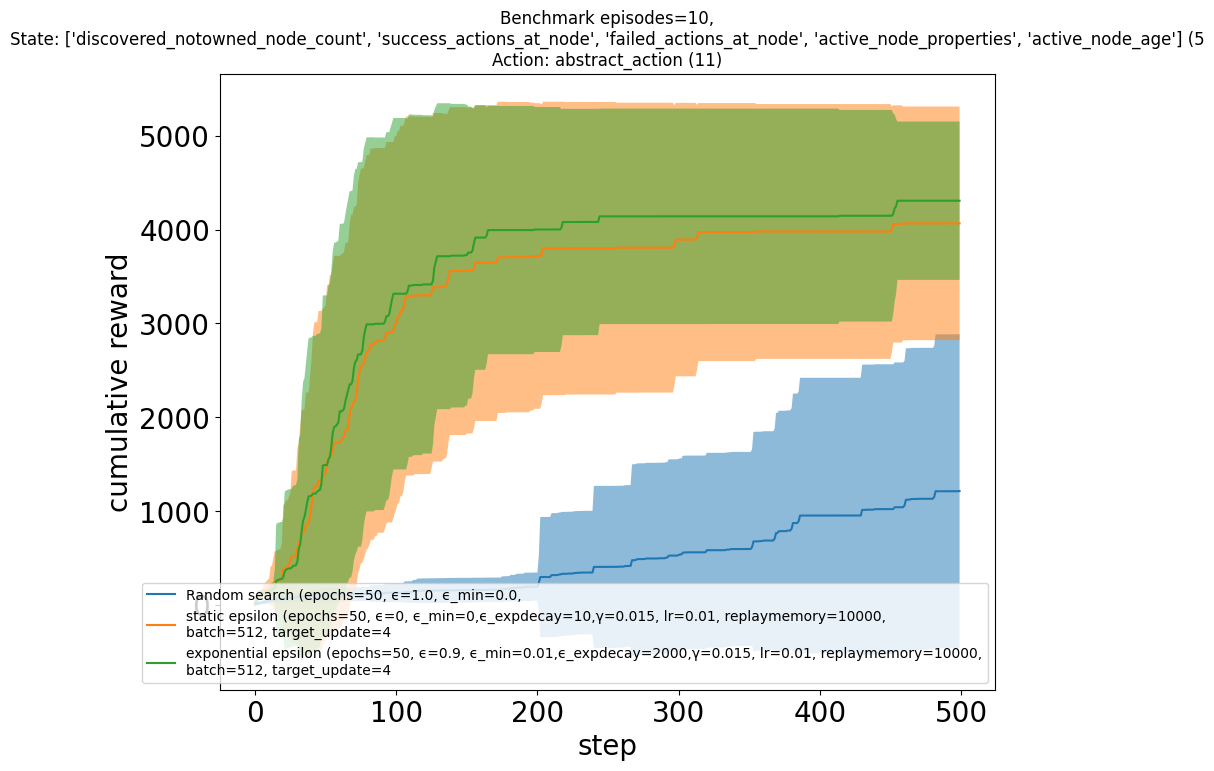

In [8]:
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

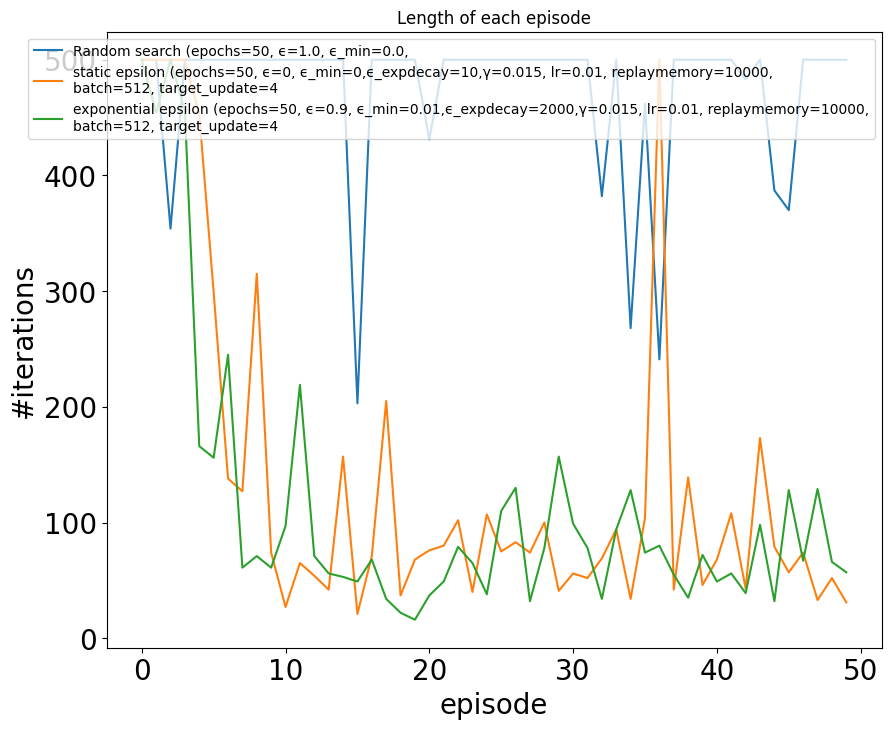

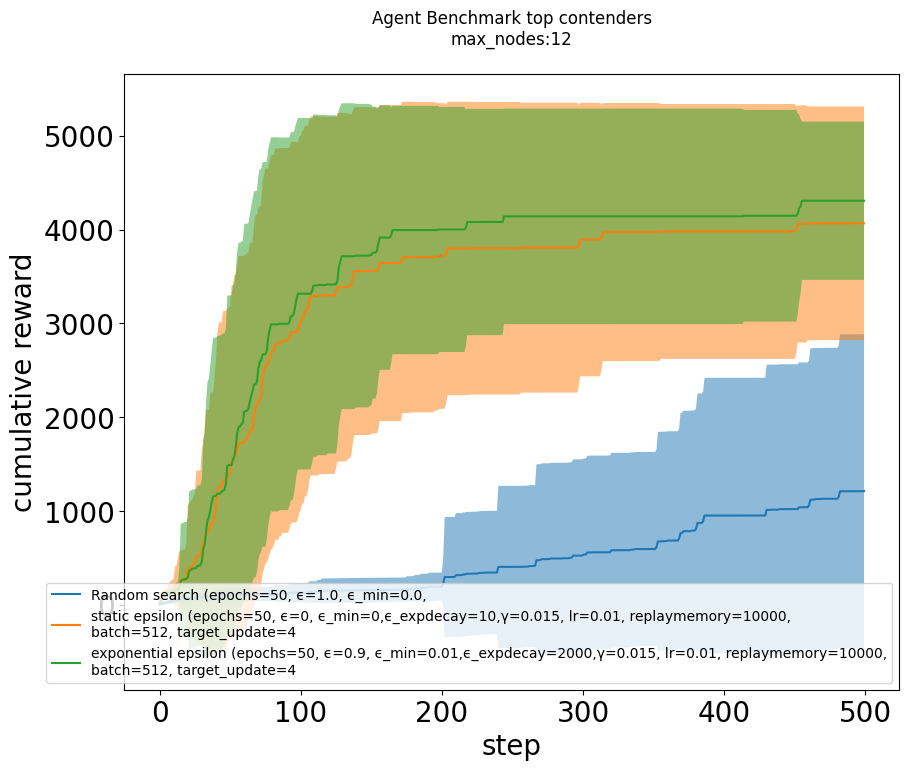

In [9]:


contenders = [
    random_run,
    dql_no_ep,
    dql_ep,
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)



     
